# Import Required Libraries

In [37]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Create SQLite Database and Table

In [44]:
conn=sqlite3.connect("Sales.db")
cur=conn.cursor()

In [46]:
cur.execute("""CREATE TABLE if not exists Sales (
    SaleDate DATE,
    CustomerName VARCHAR(100) Not Null,
    Product VARCHAR(50) Not Null,
    Quantity INT Not Null,
    UnitPrice INT Not Null,
    TotalSale INT Not Null
)""")

conn.commit()

# Insert Data into Table

In [57]:
Sales = [('2025-07-01', 'John Smith', 'Laptop', 2, 900, 1800),
('2025-07-01', 'Sarah Johnson', 'Keyboard', 5, 25, 125),
('2025-07-02', 'Mike Davis', 'Monitor', 1, 200, 200),
('2025-07-02', 'Emma Wilson', 'Mouse', 3, 15, 45),
('2025-07-03', 'Chris Brown', 'Headphones', 2, 60, 120),
('2025-07-03', 'Olivia Martin', 'Laptop', 1, 900, 900),
('2025-07-04', 'David Lee', 'Webcam', 4, 40, 160),
('2025-07-04', 'Sophia Taylor', 'Keyboard', 2, 25, 50),
('2025-07-05', 'James Anderson', 'Monitor', 2, 200, 400),
('2025-07-05', 'Ava Thomas', 'Mouse', 5, 15, 75)]

cur.executemany("Insert into Sales (SaleDate, CustomerName, Product, Quantity, UnitPrice, TotalSale) values (?,?,?,?,?,?)", Sales)

conn.commit()

# Run SQL Query Inside Jupyter Notebook

In [60]:
query = "select * from sales"
df=pd.read_sql(query,conn)
df.head(10)

,SaleDate,CustomerName,Product,Quantity,UnitPrice,TotalSale
0,2025-07-01,John Smith,Laptop,2,900,1800
1,2025-07-01,Sarah Johnson,Keyboard,5,25,125
2,2025-07-02,Mike Davis,Monitor,1,200,200
3,2025-07-02,Emma Wilson,Mouse,3,15,45
4,2025-07-03,Chris Brown,Headphones,2,60,120
5,2025-07-03,Olivia Martin,Laptop,1,900,900
6,2025-07-04,David Lee,Webcam,4,40,160
7,2025-07-04,Sophia Taylor,Keyboard,2,25,50
8,2025-07-05,James Anderson,Monitor,2,200,400
9,2025-07-05,Ava Thomas,Mouse,5,15,75


# Data Analysis Using SQL Query

In [67]:
query="select Product, sum(TotalSale) as Total_sale from sales group by 1 order by 2 desc"
df=pd.read_sql(query,conn)
df

,Product,Total_sale
0,Laptop,2700
1,Monitor,600
2,Keyboard,175
3,Webcam,160
4,Mouse,120
5,Headphones,120


In [71]:
query="select Product, avg(Totalsale) as Highest_Sales from sales group by 1 order by 2 desc"
df=pd.read_sql(query,conn)
df

,Product,Highest_Sales
0,Laptop,1350.0
1,Monitor,300.0
2,Webcam,160.0
3,Headphones,120.0
4,Keyboard,87.5
5,Mouse,60.0


# Visualizing SQL Query Using Python

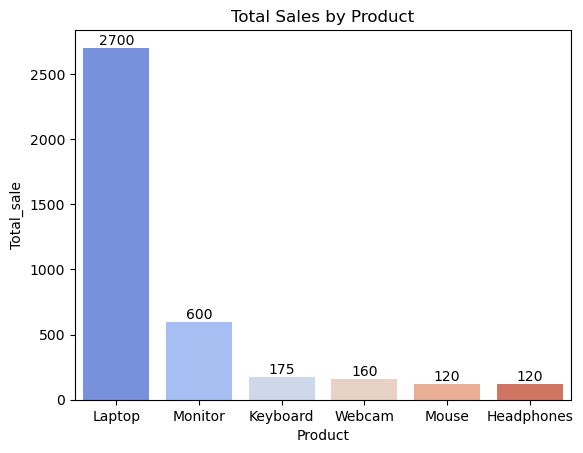

In [90]:
query="select Product, sum(TotalSale) as Total_sale from sales group by 1 order by 2 desc"
df_sales=pd.read_sql(query,conn)
ax=sns.barplot(x='Product',y='Total_sale',data=df_sales, palette='coolwarm')
for bars in ax.containers:
 ax.bar_label(bars)
plt.title("Total Sales by Product")
plt.show()